   # Assignment: Applied Statistics and Inference

**1.  What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?**

 - A Type I error occurs when you reject a true null hypothesis (H₀), Impacts Leads to wrong actions, such as approving an ineffective drug.
 -  A type II error occurs when you fail to reject a false null hypothesis (H₀), impacts leads to missed opportunities or failure to take needed action.

**2. What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?**

 - The P-value is the probability of obtaining the observed results (or more extreme results) assuming that the null hypothesis (H₀) is true.
 - A small P-value means the observed data is unlikely under the null hypothesis.
 - A large P-value means the observed data is likely under H₀.

 **3. Explain the difference between a Z-test and a T-test, including when to use each.**

 - Z-test Used when population variance (σ²) is known whereas T-test Used when population variance is unknown.
- T-test Uses standard normal distribution while T-test
  Used when population variance is unknown.

**4. What is a confidence interval, and how does the   margin of error influence its width and interpretation?**

 - A confidence interval (CI) is a range of values that is likely to contain the true population parameter (such as the mean or proportion) with a certain level of confidence.
 - The margin of error (ME) is the amount added and subtracted from the sample estimate to create the confidence interval.
 - Confidence Interval = Sample Estimate ± Margin of Error

**5.  Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?**

- The purpose of ANOVA is to determine whether there is a statistically significant difference between the means of three or more groups.
 - It increases the probability of Type I error (false  positives).
  For example: Comparing 4 groups with t-tests = 6 comparisons → high error risk.

**6. Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.**

In [ ]:
import numpy as np
from scipy.stats import norm

# Sample dataset
data = np.array([52, 55, 48, 50, 49, 53, 54, 51, 50, 52])

# Known population mean (μ0)
mu_0 = 50

# Known population standard deviation (σ)
sigma = 3

# Sample statistics
sample_mean = np.mean(data)
n = len(data)

# Z-test formula
z_stat = (sample_mean - mu_0) / (sigma / np.sqrt(n))

# P-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print("Sample Mean =", sample_mean)
print("Z-statistic =", z_stat)
print("P-value =", p_value)

# Interpretation at α = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between sample and population mean.")


Sample Mean = 51.4
Z-statistic = 1.4757295747452421
P-value = 0.1400165031971694
Fail to reject the null hypothesis: No significant difference between sample and population mean.


7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

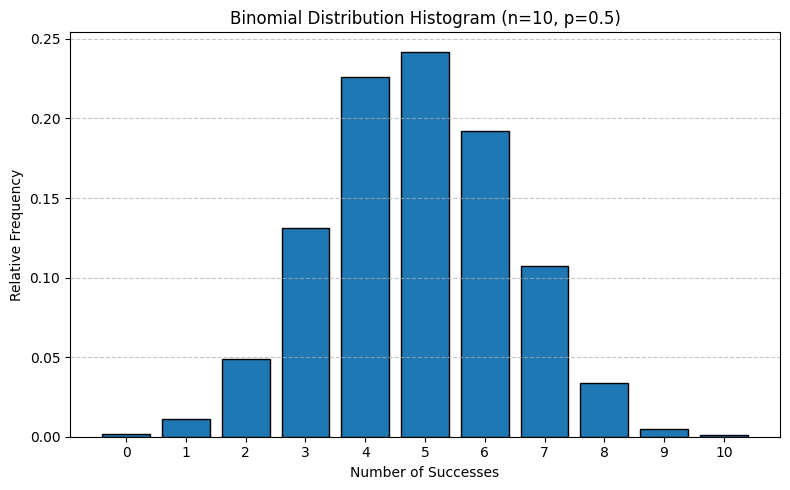

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters for the binomial distribution
n = 10 # Number of trials
p = 0.5 # Probability of success
size = 1000 # Number of samples to generate
# Simulate binomial data
data = np.random.binomial(n=n, p=p, size=size)
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black',
rwidth=0.8, density=True)
plt.title(f'Binomial Distribution Histogram (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Relative Frequency')
plt.xticks(range(n+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**8. Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.**


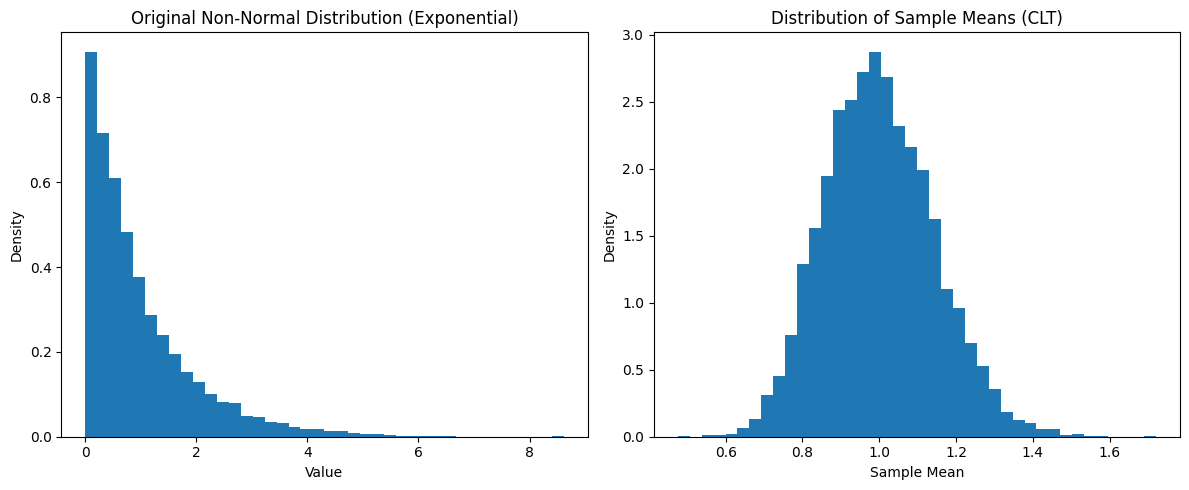

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate samples from a non-normal distribution (Exponential)
np.random.seed(42)

sample_size = 50        # size of each sample
num_samples = 10000     # number of samples

# Store sample means
sample_means = []

for _ in range(num_samples):
    sample = np.random.exponential(scale=1.0, size=sample_size)
    sample_means.append(np.mean(sample))

# Convert to array
sample_means = np.array(sample_means)

# Step 2: Plot the results
plt.figure(figsize=(12, 5))

# Plot original distribution
plt.subplot(1, 2, 1)
data = np.random.exponential(scale=1.0, size=10000)
plt.hist(data, bins=40, density=True)
plt.title("Original Non-Normal Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Density")

# Plot distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=40, density=True)
plt.title("Distribution of Sample Means (CLT)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


**9. Write a Python function to calculate and visualize the confidence interval for a sample mean.**

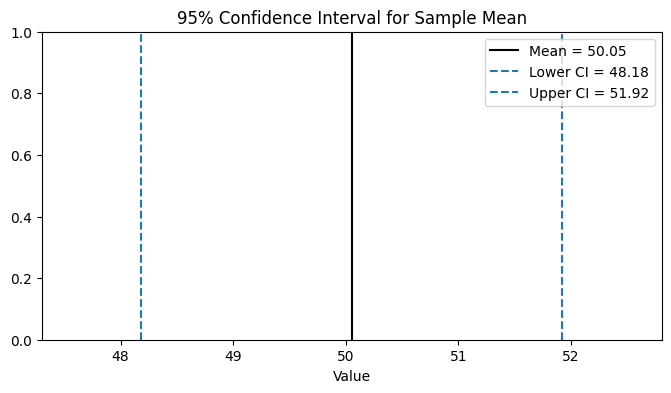

Sample Mean: 50.05271367093135
Confidence Interval: (np.float64(48.18137157483201), np.float64(51.92405576703068))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def visualize_confidence_interval(data, confidence=0.95):
    # Calculate sample statistics
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    n = len(data)

    # Standard error
    se = sample_std / np.sqrt(n)

    # t-critical value
    t_crit = stats.t.ppf((1 + confidence) / 2, df=n-1)

    # Margin of error
    margin_of_error = t_crit * se

    # Confidence interval
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    # Visualization
    plt.figure(figsize=(8, 4))

    # Plot mean and CI lines
    plt.axvline(sample_mean, color='black', label=f"Mean = {sample_mean:.2f}")
    plt.axvline(ci_lower, linestyle='--', label=f"Lower CI = {ci_lower:.2f}")
    plt.axvline(ci_upper, linestyle='--', label=f"Upper CI = {ci_upper:.2f}")

    plt.title(f"{int(confidence*100)}% Confidence Interval for Sample Mean")
    plt.xlabel("Value")
    plt.legend()
    plt.show()

    return sample_mean, (ci_lower, ci_upper)


# Example usage:
data = np.random.normal(loc=50, scale=10, size=100)
mean, ci = visualize_confidence_interval(data)

print("Sample Mean:", mean)
print("Confidence Interval:", ci)


**10. Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.**

In [ ]:
import scipy.stats as stats

# Observed and expected frequencies
observed = [50, 30, 20]
expected = [40, 40, 20]

# Perform Chi-square Goodness-of-Fit test
chi_square_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Statistic:", chi_square_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Observed data does NOT fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis: Observed data fits the expected distribution.")


Chi-square Statistic: 5.0
P-value: 0.0820849986238988
Fail to reject the null hypothesis: Observed data fits the expected distribution.


**Explaination of outcome**
- The observed frequencies follow the expected distribution.
- The observed frequencies do not follow the expected distribution.